In [2]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
def fitness_function(individual):
  return(abs(96 - individual[0]) + abs(96 - individual[1]) + abs(159 - individual[2]))

In [4]:
class Individual:
  chromosome = ''
  def __init__(self, min_diap, max_diap, count_gene):
    self.chromosome = []

    for i in range(0, count_gene):
      gene = random.randint(min_diap, max_diap)
      buff = '00000000'

      for j in range(0, len(buff)):
        buff = buff[:len(buff) - 1 - j] + str(gene % 2) + buff[len(buff) - 1 - j + 1:]
        gene = gene // 2
      self.chromosome.append(buff)
    
    self.chromosome = ''.join(self.chromosome)
  
  def convert_chromosome(self, size_gene):
    k = 0
    gene_list = []
    while k < len(self.chromosome):
      gene_list.append(int(self.chromosome[0 + k:size_gene + k], 2))
      k = k + size_gene
    return(gene_list)

In [113]:
class GeneticAlgorithm:
  population = []
  size_population = 0
  size_gene = 0
  count_gene = 0
  best_individual = []
  best_score = math.inf
  print_best_score = []

  def __init__(self):
    self.population = []

  def create_population(self, size, min_diap, max_diap, count_gene, size_gene):
    self.print_best_score = []
    self.population = []
    self.size_gene = size_gene
    self.count_gene = count_gene
    self.size_population = size
    for i in range(0, self.size_population):
      self.population.append(Individual(min_diap, max_diap, count_gene))
  
  def start(self, generation = 100):
    best_score = math.inf
    best_chromosome = []
    for i in self.population:
      if fitness_function(i.convert_chromosome(8)) < best_score:
        best_score = fitness_function(i.convert_chromosome(8))
        best_chromosome = i
    
    self.print_best_score.append(best_score)
    #print(best_chromosome.convert_chromosome(8), best_chromosome.chromosome, fitness_function(best_chromosome.convert_chromosome(8)))
    
    for i in range(0, generation):
      self.selection()
      self.crossbreeding()
      self.mutation(1 / (self.size_gene * self.count_gene))

      best_score = math.inf
      best_chromosome = []
      for i in self.population:
        if fitness_function(i.convert_chromosome(8)) < best_score:
          best_score = fitness_function(i.convert_chromosome(8))
          best_chromosome = i
      
      self.print_best_score.append(best_score)
      #print(best_chromosome.convert_chromosome(8), best_chromosome.chromosome, fitness_function(best_chromosome.convert_chromosome(8)))



  def selection(self, l = 0.5):
    score_fitness_function = []
    for i in self.population:
      score_fitness_function.append(fitness_function(i.convert_chromosome(self.size_gene)))
      
    mask = []
    for j, i in zip(self.population, score_fitness_function):
      if i < np.quantile(score_fitness_function, 1 - l):
        mask.append(j)

    self.population = mask

  def crossbreeding(self, Pc = 0.8):
    k = 0
    new_population = []

    while k < self.size_population:
      i = random.randint(0, len(self.population) - 1)
      j = random.randint(0, len(self.population) - 1)
      if Pc > random.uniform(0, 1):
        w = random.randint(1, len(self.population[i].chromosome) - 1)
        child_1 = Individual(1, 1, 1)
        child_2 = Individual(1, 1, 1)
        child_1.chromosome = self.population[i].chromosome[:w] + self.population[j].chromosome[w:]
        child_2.chromosome = self.population[j].chromosome[:w] + self.population[i].chromosome[w:]
        new_population.append(child_1)
        new_population.append(child_2)
      else:
        new_population.append(self.population[i])
        new_population.append(self.population[j])
      k = k + 2
        
    self.population = new_population

  def mutation(self, probability):
    for i in self.population:
      for j in range(0, len(i.chromosome)):
        if probability > random.uniform(0, 1):
          if i.chromosome[j] == '0':
            i.chromosome = i.chromosome[:j] + '1' + i.chromosome[j + 1:]
          else:
            i.chromosome = i.chromosome[:j] + '0' + i.chromosome[j + 1:]

In [114]:
x = GeneticAlgorithm()
x.create_population(200, 0, 255, 3, 8)
len(x.population)

200

In [115]:
best_score = math.inf
best_chromosome = []

for i in x.population:
  if fitness_function(i.convert_chromosome(8)) < best_score:
    best_score = fitness_function(i.convert_chromosome(8))
    best_chromosome = i

print(best_chromosome.convert_chromosome(8), best_chromosome.chromosome, fitness_function(best_chromosome.convert_chromosome(8)))

[94, 107, 197] 010111100110101111000101 51


In [116]:
%%time
x.start(60)

CPU times: user 1.88 s, sys: 837 µs, total: 1.88 s
Wall time: 1.89 s


In [117]:
best_score = math.inf
best_chromosome = []

for i in x.population:
  if fitness_function(i.convert_chromosome(8)) < best_score:
    best_score = fitness_function(i.convert_chromosome(8))
    best_chromosome = i

print(best_chromosome.convert_chromosome(8), best_chromosome.chromosome, fitness_function(best_chromosome.convert_chromosome(8)))

[96, 95, 160] 011000000101111110100000 2


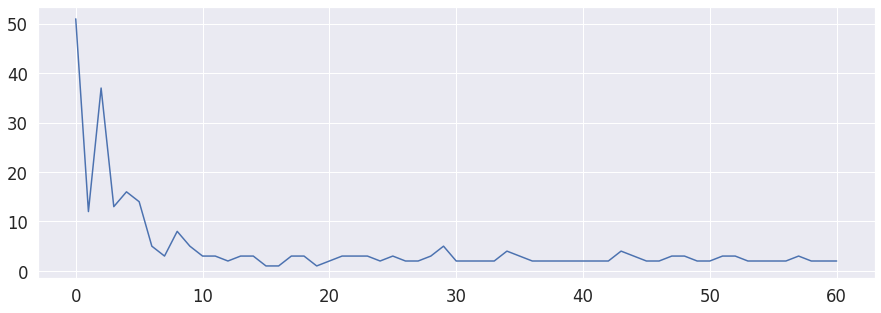

In [118]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x = range(0, 61), y = x.print_best_score);